## Langgraph

### StateGraph
There are three four types of graph structures are there in langgraph, those are
- sequential graph
- parallel graph
- conditional graph
- looping graph

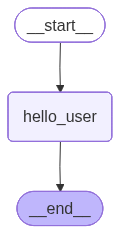

{'name': 'Abhijeet', 'result': 'Hello Abhijeet. How are you?'}


In [ ]:
# Import dependencies
from langgraph.graph import StateGraph, START, END
from IPython.display import Image
from typing import TypedDict

# Sequential Graph
# Define state for graph
class State(TypedDict):
    name: str
    result: str

# Create Node function
def hello_user(state: State):
    return {'result': f'Hello {state["name"]}. How are you?'}


# Create stategraph
graph = StateGraph(State)

# Add node and edges into the graph
graph.add_node('hello_user', hello_user)

graph.add_edge(START, 'hello_user')
graph.add_edge('hello_user', END)

# Compile the graph
workflow = graph.compile()

# Display the graph
display(Image(workflow.get_graph().draw_mermaid_png()))

# Use graph to create response
response = workflow.invoke({'name':'Abhijeet'})
print(response)

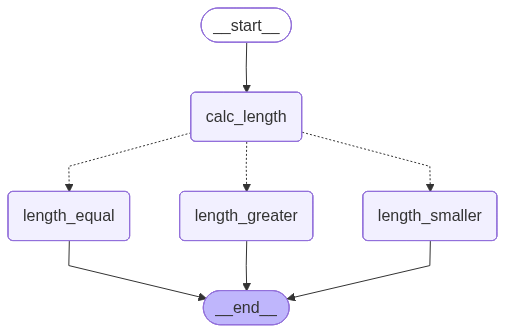

{'input_text': 'Hello my name is Abhijit',
 'length': 5,
 'output_text': 'Input word count length is smaller than 10'}

In [ ]:
# Import dependencies
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from IPython.display import display, Image

# Conditional Graph
# Define state for the graph
class State(TypedDict):
    input_text: str
    length: int
    output_text: str
   
# Required function 
def length_greater(state: State):
    return {'output_text': 'Input word count length is greater than 10'}

def length_smaller(state: State):
    return {'output_text': 'Input word count length is smaller than 10'}

def length_equal(state: State):
    return {'output_text': 'Input word count is equal to 10'}

def calculate_length(state: State):
    return {'length': len(state['input_text'].split())}

# Conditional Functions for routing
def condition_func(state: State) -> Literal['length_smaller', 'length_equal', 'length_greater']:
    text_length = state['length']
    
    if text_length < 10:
        return 'length_smaller'
    elif text_length > 10:
        return 'length_greater'
    else:
        return 'length_equal'

# Define graph
graph = StateGraph(State)

# Add node and edges to the graph
graph.add_node('calc_length', calculate_length)
graph.add_node('length_smaller', length_smaller)
graph.add_node('length_equal', length_equal)
graph.add_node('length_greater', length_greater)

graph.add_edge(START, 'calc_length')
graph.add_conditional_edges('calc_length', condition_func)
graph.add_edge('length_smaller', END)
graph.add_edge('length_equal', END)
graph.add_edge('length_greater', END)

# Compile the graph
workflow = graph.compile()
display(Image(workflow.get_graph().draw_mermaid_png()))

# Use graph to create response
response = workflow.invoke({'input_text': 'Hello my name is Abhijit'})
response

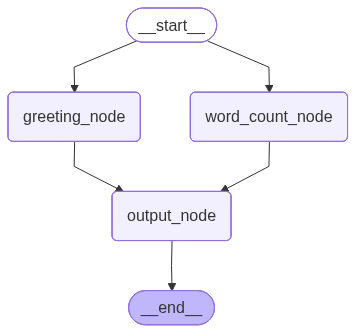

{'input_text': 'Abhijeet',
 'greeting': 'Hello Abhijeet. How are you?',
 'word_count': 8,
 'output_text': 'Hello Abhijeet. How are you?\nYour word count is 8.'}

In [ ]:
# Import dependencies
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Define state for the graph
class State(TypedDict):
    input_text: str
    greeting: str
    word_count: int
    output_text: str
  
# Required functions  
def greeting(state: State):
    return {'greeting': f"Hello {state['input_text']}. How are you?"}

def word_count(state: State):
    return {'word_count': len(state['input_text'])}

def output_text(state: State):
    return {'output_text': f"{state['greeting']}\nYour word count is {state['word_count']}."}

# Define Stategraph
graph = StateGraph(State)

# Add node and edges to the graph
graph.add_node('greeting_node', greeting)
graph.add_node('word_count_node', word_count)
graph.add_node('output_node', output_text)

graph.add_edge(START, 'greeting_node')
graph.add_edge(START, 'word_count_node')
graph.add_edge('greeting_node', 'output_node')
graph.add_edge('word_count_node', 'output_node')
graph.add_edge('output_node', END)

# Compile the graph
workflow = graph.compile()
display(Image(workflow.get_graph().draw_mermaid_png()))

# Use graph to create response
response = workflow.invoke({'input_text': 'Abhijeet'})
response

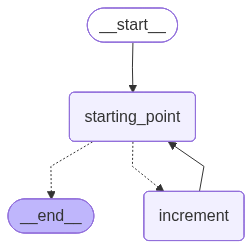

Current iteration: 1
Current iteration: 2
Current iteration: 3
Current iteration: 4
Current iteration: 5
Current iteration: 6
Current iteration: 7
Current iteration: 8
Current iteration: 9
Current iteration: 10
Iteration Completed


In [ ]:
# Import dependencies
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from IPython.display import display, Image

# Define the state for the graph
class State(TypedDict):
    iteration: int

# Define necessary functions 
def starting_point(state: State):
    return state

def iteration_loop(state: State) -> Literal['increment', END]:
    if state['iteration'] <= 10:
        print(f"Current iteration: {state['iteration']}")
        return 'increment'
    else:
        print("Iteration Completed")
        return END
        
def increment(state: State):
    return {'iteration': state['iteration'] + 1}

# Define the Graph
graph = StateGraph(State)

# Add node and edges to the graph
graph.add_node('starting_point', starting_point)
graph.add_node('increment', increment)

graph.add_edge(START, 'starting_point')
graph.add_conditional_edges('starting_point', iteration_loop)
graph.add_edge('increment', 'starting_point')

# Compile and run the graph
workflow = graph.compile()
display(Image(workflow.get_graph().draw_mermaid_png()))

response = workflow.invoke({'iteration': 1})

d:\AI ML\AI ML Projects\Notebooks\Langchain and Langgraph Code At Once\venv\lib\site-packages\langchain_nvidia_ai_endpoints\_common.py:227: UserWarning: Found nvidia/nvidia-nemotron-nano-9b-v2 in available_models, but type is unknown and inference may fail.
  warnings.warn(


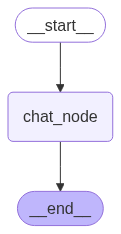

The capital of India is **New Delhi**. It is located in the northern part of the country and serves as the seat of the Indian government. New Delhi was established as the capital in 1911, replacing Kolkata (formerly Calcutta).


In [13]:
# Import dependencies
from typing import Annotated, TypedDict, List
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from IPython.display import display, Image
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import AIMessage, HumanMessage

# Here we are going to learn how to build chatbots using Langgraph
# Define model
model = ChatNVIDIA(model = "nvidia/nvidia-nemotron-nano-9b-v2")

# Define Message State
class MessageState(TypedDict):
    messages: Annotated[List[BaseMessage],add_messages]
  
# Define necessary functions  
def chatnode(state: MessageState):
    messages = state['messages']
    response = model.invoke(messages)
    return {'messages': [response]}
  
# Add checkpointer for memory  
checkpointer = InMemorySaver()

# Create graph
graph = StateGraph(MessageState)

# Add node and edges to the graph
graph.add_node('chat_node', chatnode)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# Compile and run the graph
workflow = graph.compile(checkpointer=checkpointer)
display(Image(workflow.get_graph().draw_mermaid_png()))

config1 = {'configurable': {'thread_id': '4'}}

initiate_message = {
    'messages': [HumanMessage(content="What is the capital of India?")]
}

response = workflow.invoke(initiate_message, config=config1)['messages'][-1].content
print(response)

In [ ]:
# Run the chatbot in the loop with memory using checkpointers and thread id
# Concept of persistance
thread_id = '1'
config = {'configurable': {'thread_id': thread_id}}

while True:
    
    user_input = input("Enter your message: ")
    
    print(f"User: {user_input}")
    
    if user_input.lower() in ('exit', 'quit', 'bye'):
        break
    
    response = workflow.invoke({'messages': [HumanMessage(content= user_input)]}, config=config)
    
    print(f"AI: {response['messages'][-1].content}")

User: Hii
AI: Hello! How can I assist you today? 😊
User: My name is Abhijeet and I am 22 years old. I am living in India
AI: Hello Abhijeet! It's great to meet you. How can I assist you today? 😊 Whether you have questions, need recommendations, or just want to chat about life in India or anything else, feel free to let me know!
User: I just want to know how are you
AI: Hi Abhijeet! I'm doing well, thanks for asking! 😊 Since I'm an AI, I don't have feelings, but I'm always here to help you with anything you need. How can I assist you today?
User: I have one question like, if you get a chance to live a life like human, then how you will live that life
AI: That’s such a fascinating and imaginative question! 😊 While I don’t have consciousness or emotions, I can certainly speculate creatively about what it might mean to "live" as a human. If I were to experience human life hypothetically, I might focus on:  

1. **Learning and Curiosity**: Exploring the world, asking questions, and seeking 

In [ ]:
# Next topic
# Benifits of persistance
# 1. Short term memory
# 2. Fault tolerance
# 3. Human in the loop
# 4. Time travel